# Problem 2: Exponential smoothing

This problem is related to exponential smoothing which is a technique for smoothing time series data. There is exponential weighting of all past observations where more recent observations are more important to the current baseline estimate. Exponential smoothing is a simple method to smooth data and forecast future data.

This problem has five exercises, numbered 0 through 4, and is worth a total of ten (10) points. Depending on your approach, exercise 4 may depend on exercises 2 and 3, but exercises 0 and 1 are independent.

In [1]:
import numpy as np
import pandas as pd
from base64 import b64decode
from ast import literal_eval

#Some functions we use for testing

#error threshold
ERROR_THRESHOLD = 0.01

#assert that values in the list are close enough
def assert_close_enough(answer_list, student_list):
    assert type(answer_list) == list, "`answer_list` is not a list"
    assert type(student_list) == list, "`student_list` is not a list"
    assert len(answer_list) == len(student_list), "the lists are not the same length"
    #loop through and assert values
    for answer, student in zip(answer_list, student_list):
        if abs(answer - student) > ERROR_THRESHOLD:
            #the difference is above threshold
            return False
    return True

#assert values in a list are numbers
def assert_numbers(nums):
    for num in nums:
        assert isinstance(num, (int, float))

#load encoded file
def load_enc_file(filename):
    result = None
    with open(filename) as f:
        filedata = f.read()
        result = literal_eval(b64decode(filedata.encode("utf-8")).decode("utf-8").strip())
    return result

### Description
When we have variation in time series data, we can use exponential smoothing to smooth out jumps in data. You have two ways to account for a change, you can say that the observed data point is a real indicator of the baseline ($S_{t}=x_{t}$). Or, you can say that today's baseline is the same as yesterday's baseline ($S_{t}=S_{t-1}$). You make this decision through the use of a tuning paramater ($\alpha$ for $S$). You would set this tuning paramter closer to 0 if there is a lot of randomness in the system and closer to 1 if there is not much randomness in the system. For this problem you do not need to set these tuning parameters but for future reference you should know that they exist.

#### The expected baseline response at time period $t$ where $\alpha$ is the tuning parameter.
#### $S_{t} = \alpha{x_{t}} + (1-\alpha)S_{t-1}$

**Exercise 0** (1 point).

Write a function `single_es` with the following parameters.  

`x`: the current data of x. **$x_{t}$**  
`prev_s`: the previous baseline value. **$S_{t-1}$**     
`alpha`: the tuning paramerter for the baseline response. **$\alpha$**  

The function should return a value that corresponds to **$S_{t}$ rounded to 5 decimal places**.

In [2]:
def single_es(x, prev_s, alpha):
    assert_numbers([x, prev_s, alpha]) # checks to see if the values are ints or floats
    #
    return round((alpha*x) + ((1-alpha) * prev_s), 5)
    #

In [3]:
# Test cell: `single_es_test` (1 point)
### Test Case 1...
print("Test Case 1...")
input_1 = (94, 50, 0.5)
answer_1 = 72.0
result_1 = single_es(*input_1)
assert assert_close_enough([answer_1], [result_1]), "Correct Output {}, Your Output: {}".format(answer_1, result_1)

### Test Case 2...
print("Test Case 2...")
input_2 = (19, 63, 0.3)
answer_2 = 49.8
result_2 = single_es(*input_2)
assert assert_close_enough([answer_2], [result_2]), "Correct Output {}, Your Output: {}".format(answer_2, result_2)

### Test Case 3...
print("Test Case 3...")
input_3 = (78.3, 50.8, 0.8)
answer_3 = 72.8
result_3 = single_es(*input_3)
assert assert_close_enough([answer_3], [result_3]), "Correct Output {}, Your Output: {}".format(answer_3, result_3)

print("\n(Passed!)")

Test Case 1...
Test Case 2...
Test Case 3...

(Passed!)


### Description
Single exponential smoothing will not work well if there is a trend in the data. In order to account for a trend, we can introduce a new term to account for a trend in the data. This is called double exponential smoothing. 

#### The expected baseline response at time period $t$ where $\alpha$ is the tuning parameter.
#### $S_{t} = \alpha{x_{t}} + (1-\alpha)(S_{t-1} + T_{t-1})$

#### The trend at time period $t$ where $\beta$ is the tuning parameter.
#### $T_{t} = \beta(S_{t} - S_{t-1}) + (1-\beta)T_{t-1}$

**Exercise 1** (2 points).

Write a function `double_es` with the following parameters.  

`x`: the current data of x. **$x_{t}$**  
`prev_s`: the previous baseline value. **$S_{t-1}$**     
`alpha`: the tuning paramerter for the baseline response. **$\alpha$**    
`prev_t`: the previous trend value. **$T_{t-1}$**  
`beta`: the tuning paramerter for the trend. **$\beta$**   

The function should return a tuple of `(s, t)` that corresponds to **$S_{t}$** and **$T_{t}$ both rounded to 5 decimal places**.

In [4]:
def double_es(x, prev_s, alpha, prev_t, beta):
    assert_numbers([x, prev_s, alpha, prev_t, beta])
    
    # First calculate S_t & T_t
    S_t = (alpha * x) + (1 - alpha) * (prev_s + prev_t)
    T_t = (beta * (S_t - prev_s)) + ((1-beta) * prev_t)
    
    # Return the rounded tuple
    return (round(S_t, 5), round(T_t, 5))

In [5]:
# Test cell: `double_es_test` (2 points)
### Test Case 1...
print("Test Case 1...")
input_1 = (82, 62, 0.5, 2, 0.5)
answer_1 = (73.0, 6.5)
result_1 = double_es(*input_1)
assert assert_close_enough(list(answer_1), list(result_1)), "Correct Output {}, Your Output: {}".format(answer_1, result_1)

### Test Case 2...
print("Test Case 2...")
input_2 = (50, 43, 0.4, -7, 0.4)
answer_2 = (41.6, -4.76)
result_2 = double_es(*input_2)
assert assert_close_enough(list(answer_2), list(result_2)), "Correct Output {}, Your Output: {}".format(answer_2, result_2)

### Test Case 3...
print("Test Case 3...")
input_3 = (57.2, 72.8, 0.8, 8.1, 0.8)
answer_3 = (61.94, -7.07)
result_3 = double_es(*input_3)
assert assert_close_enough(list(answer_3), list(result_3)), "Correct Output {}, Your Output: {}".format(answer_3, result_3)

print("\n(Passed!)")

Test Case 1...
Test Case 2...
Test Case 3...

(Passed!)


## Triple Exponential Smoothing

Suppose we want to capture seasonality changes in our exponential smoothing model. What we can do is add another to the previously implemented double exponential smoothing model to account for seasonal effects. This is known as triple exponential smoothing. There are many ways to add seasonality into an exponential smoothing model, we will implement the following method for triple exponential smoothing. 

#### The expected baseline response at time period $t$ where $\alpha$ is the tuning parameter.
#### $S_{t} = \alpha(\frac{x_{t}}{C_{t-L}}) + (1-\alpha)(S_{t-1} + T_{t-1})$

#### The trend at time period $t$ where $\beta$ is the tuning parameter.
#### $T_{t} = \beta(S_{t} - S_{t-1}) + (1-\beta)T_{t-1}$

#### The multiplicative seasonality factor for time $t$ where $\gamma$ is the tuning parameter and $L$ is the length of a cycle.  
#### $C_{t} = \gamma(\frac{x_{t}}{S_{t}}) + (1-\gamma)C_{t-L}$

**Exercise 2** (2 points). 

Write a function `triple_es` with the following parameters.  

`x`: the current data of x. **$x_{t}$**  
`prev_s`: the previous baseline value. **$S_{t-1}$**     
`alpha`: the tuning paramerter for the baseline response. **$\alpha$**    
`prev_t`: the previous trend value. **$T_{t-1}$**  
`beta`: the tuning paramerter for the trend. **$\beta$**  
`prev_c`: the $L^{th}$ previous seasonality factor. **$C_{t-L}$**  
`gamma`: the tuning parameter for the seasonality. **$\gamma$**    

The function should return a tuple of `(s, t, c)` that corresponds to **$S_{t}$, $T_{t}$**, and **$C_{t}$ all rounded to 5 decimal places**.

In [8]:
def triple_es(x, prev_s, alpha, prev_t, beta, prev_c, gamma):
    assert_numbers([x, prev_s, alpha, prev_t, beta, prev_c, gamma])
    
    # Calculate S_t, T_t, and C_t
    S_t = (alpha * (x/prev_c)) + ((1 - alpha)* (prev_s + prev_t))
    T_t = (beta * (S_t - prev_s)) + ((1 - beta) * (prev_t))
    C_t = (gamma * (x / S_t)) + ((1 - gamma) * prev_c)
    
    # Round them off to 5 decimal places
    return (round(S_t, 5), round(T_t, 5), round(C_t, 5))

In [9]:
# Test cell: `triple_es_test` (2 points)
### Test Case 1...
print("Test Case 1...")
input_1 = (74, 86, 0.5, 12, 0.5, 1, 0.1)
answer_1 = (86.0, 6.0, 0.99)
result_1 = triple_es(*input_1)
assert assert_close_enough(list(answer_1), list(result_1)), "Correct Output {}, Your Output: {}".format(answer_1, result_1)

### Test Case 2...
print("Test Case 2...")
input_2 = (85, 43, 0.4, -12, 0.4, 0.9, 0.2)
answer_2 = (56.38, -1.85, 1.02)
result_2 = triple_es(*input_2)
assert assert_close_enough(list(answer_2), list(result_2)), "Correct Output {}, Your Output: {}".format(answer_2, result_2)

### Test Case 3...
print("Test Case 3...")
input_3 = (55.2, 48.5, 0.7, -4.1, 0.7, 1.1, 0.3)
answer_3 = (48.45, -1.27, 1.11)
result_3 = triple_es(*input_3)
assert assert_close_enough(list(answer_3), list(result_3)), "Correct Output {}, Your Output: {}".format(answer_3, result_3)

print("\n(Passed!)")

Test Case 1...
Test Case 2...
Test Case 3...

(Passed!)


## Forecasting With Triple Exponential Smoothing

Now we have the baseline, trend, and seasonality components for a single time period $t$. We can now do forecasting for the next time period $t+1$. 

#### Forecasting for time period $t+1$.
#### $F_{t+1} = (S_{t} + T_{t})C_{t+1-L}$

**Exercise 3** (1 point). 

Write a function `triple_forecast` with the following parameters.  

`s`: the current baseline value. **$S_{t}$**  
`t`: the current trend value. **$T_{t}$**   
`c`: the $L^{th}$ previous seasonality factor for time period **$t+1$**. **$C_{t+1-L}$**  

The function should return the forecasted value for time period **$t+1$**, **$F_{t+1}$ rounded to 5 decimal places**.

In [10]:
def triple_forecast(s, t, c):
    assert_numbers([s, t, c])
    
    # Calculate F_t+1
    F_t_plus_1 = (s + t)*c
    
    return round(F_t_plus_1, 5)

In [11]:
# Test cell: `triple_forecast_test` (1 point)
### Test Case 1...
print("Test Case 1...")
input_1 = (86.0, 6.0, 0.99)
answer_1 = 91.08
result_1 = triple_forecast(*input_1)
assert assert_close_enough([answer_1], [result_1]), "Correct Output {}, Your Output: {}".format(answer_1, result_1)

### Test Case 2...
print("Test Case 2...")
input_2 = (56.38, -1.85, 1.02)
answer_2 = 55.62
result_2 = triple_forecast(*input_2)
assert assert_close_enough([answer_2], [result_2]), "Correct Output {}, Your Output: {}".format(answer_2, result_2)

### Test Case 3...
print("Test Case 3...")
input_3 = (48.45, -1.27, 1.11)
answer_3 = 52.37
result_3 = triple_forecast(*input_3)
assert assert_close_enough([answer_3], [result_3]), "Correct Output {}, Your Output: {}".format(answer_3, result_3)

print("\n(Passed!)")

Test Case 1...
Test Case 2...
Test Case 3...

(Passed!)


## Forecasting With Triple Exponential Smoothing

Now that we have implemented `triple_es` and `triple_forecast`. It is time to put it all together. In the next exercise you will be given a list of observations for a time series data, then you will use the triple exponential smoothing model to create forecast values for each time period based off of the previous time period.

#### The initial values for this model. 
#### $S_{0} = x_{0}$
#### $T_{0} = 0$
#### $C_{0}, C_{1}, ..., C_{L-1} = 1$

**Exercise 4** (4 points). 

Write a function `forecast_data` with the following parameters.  

`X`: the list of n numbers that contains our data. **$X_{0}, X_{1}, ..., X_{n-1}$**  
`alpha`: the tuning paramerter for the baseline response. **$\alpha$**  
`beta`: the tuning paramerter for the trend. **$\beta$**   
`gamma`: the tuning parameter for the seasonality. **$\gamma$**  
`L`: the length of the seasonality.  

The function should return a tuple of `(S, T, C, forecasts)`.  
`S` - list of baseline values for the model. **$S_{t}$** for all **$t = 0, 1, ..., n-1$**  
`T` - list of trend values for the model. **$T_{t}$** for all **$t = 0, 1, ..., n-1$**  
`C` - list of seasonality factors for the model. **$C_{t}$** for all **$t = 0, 1, ..., n-1$**    
`forecasts` - the list of forecasted values from time period L to n.  

**HINT 1**: When calling `triple_es` for time periods **$t = 0, 1, ..., L-1$**, you can use 1 as the `prev_c` parameter. For **$t \geq L$** you must use **$C_{t-L}$**.  
**HINT 2**:  `S`, `T`, and `C` should have the same length as `X`.  
**HINT 3**:  `forecasts` will have the length of n - L. This is because the forecast function needs values for **$C_{t+1-L}$**, so it cannot create forecasts for the first L time periods.  


In [12]:
assert_numbers([0.7, 0.7 , 1])

In [13]:
test_X = [25,33,40,45,49,50,49,45,40,33,25,17,10,5,1,0,1,5,10,17]
test_alpha = 0.7
test_beta = 0.7
test_gamma = 0.1
test_L = 4

In [14]:
assert_numbers(test_X)
assert_numbers([test_alpha, test_beta, test_gamma])
assert type(test_L) == int

https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc431.htm

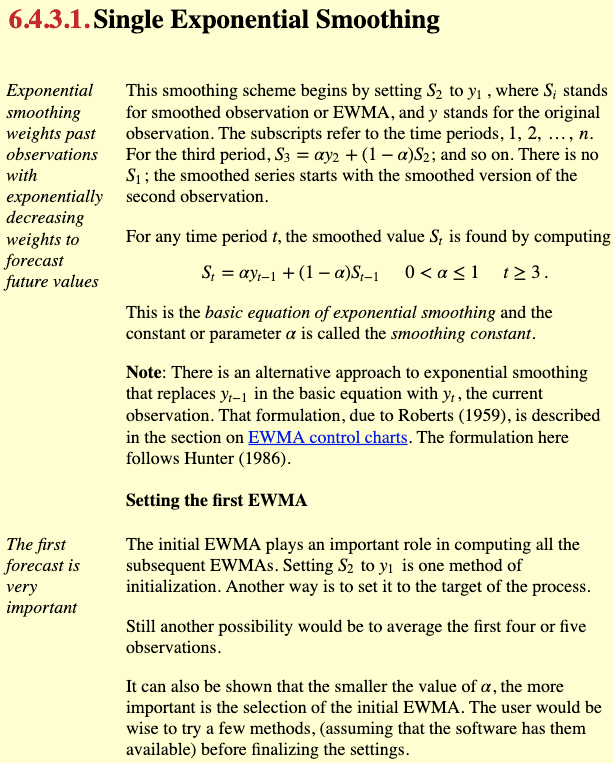

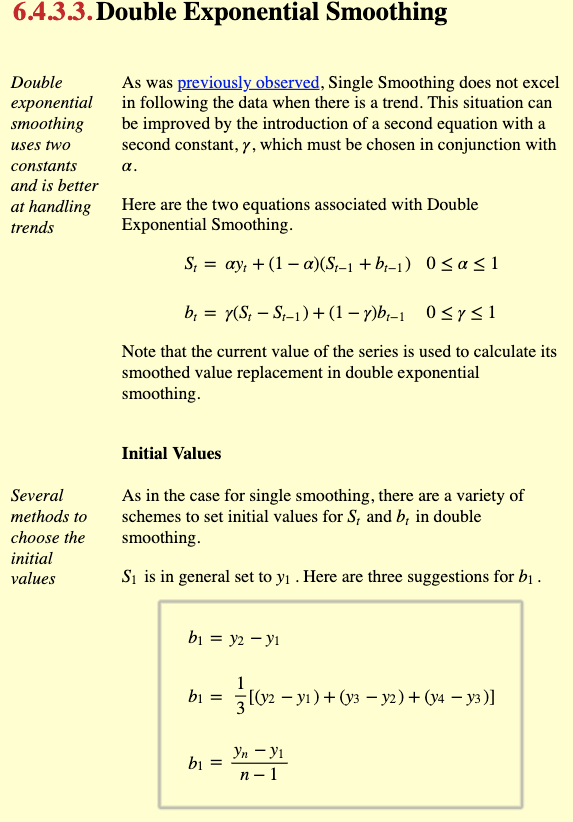

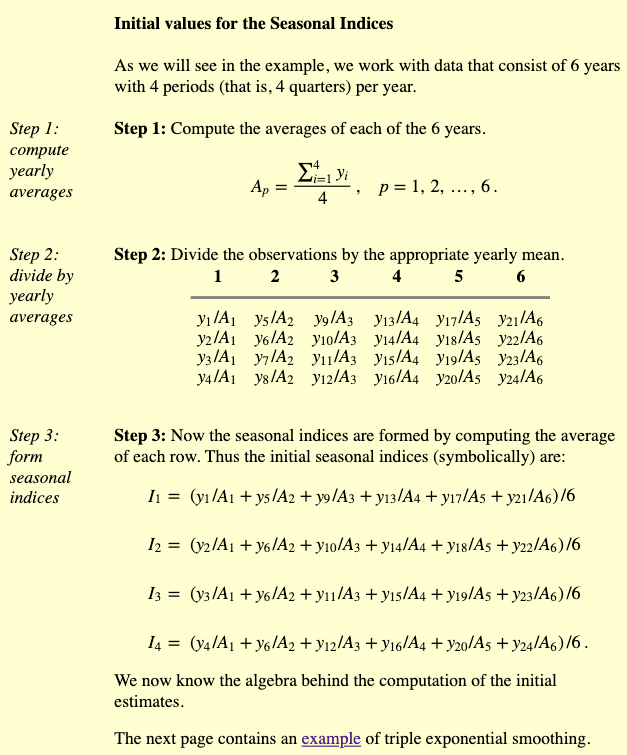

In [17]:
for i, x in enumerate(test_X[1:]):
    print((i+1, x))

(1, 33)
(2, 40)
(3, 45)
(4, 49)
(5, 50)
(6, 49)
(7, 45)
(8, 40)
(9, 33)
(10, 25)
(11, 17)
(12, 10)
(13, 5)
(14, 1)
(15, 0)
(16, 1)
(17, 5)
(18, 10)
(19, 17)


In [18]:
import numpy as np

In [25]:
def forecast_data(X, alpha, beta, gamma, L):
    assert type(X) == list
    assert_numbers(X)
    assert_numbers([alpha, beta, gamma])
    assert type(L) == int
    
    # Create dummy lists for each S_t, T_t, C_t
    S_t = [X[0]] + ([0] * (len(X)-1))
    T_t = [X[1]] + ([0] * (len(X)-1))
    C_t = [np.mean(X[:L])] + [0]*(len(X)-1)
        
    for i, x in enumerate(X[1:]):
        if i == 0:
            # Set prev_S, begin by setting S_1 (assuming index begins at 0) equal to x0
            prev_s = X[0]
            prev_t = X[1] - X[0]
            prev_c = np.mean(X[:L])
        else:
            prev_s = S_t[i-1]
            prev_t = T_t[i-1]
            prev_c = C_t[i-1]
            
        S_t[i+1] = single_es(x, prev_s, alpha)
        T_t[i+1] = double_es(x, prev_s, alpha, prev_t, beta)
        C_t[i+1] = triple_es(x, prev_s, alpha, prev_t, beta, prev_c, gamma)
        
    return (S_t, T_t, C_t)
    

In [26]:
forecast_data(test_X, test_alpha, test_beta, test_gamma, test_L)

AssertionError: 

In [ ]:
# Test cell: `forecast_data_test` (4 points)
### Test Case 1...
print("Test Case 1...")
input_1 = ([25,33,40,45,49,50,49,45,40,33,25,17,10,5,1,0,1,5,10,17], 0.7, 0.7, 0.1, 4)
answer_1_S = [25, 30.6, 38.356, 44.98836, 49.78377, 51.53835, 50.61093, 46.74335, 41.27286, 34.16385, 25.89597, 17.40439, 9.77704, 4.11004, 0.04404, -1.40868, -0.453, 3.28961, 3.97883, 14.8702]
answer_1_T = [0, 3.92, 6.6052, 6.62421, 5.34405, 2.83142, 0.20023, -2.64724, -4.62351, -6.36336, -7.69652, -8.25306, -7.81506, -6.31142, -4.73963, -2.43879, -0.06266, 2.60103, 1.26277, 8.00279]
answer_1_C = [1, 1, 1, 1, 0.99843, 0.99702, 0.99682, 0.99627, 0.9955, 0.99391, 0.99368, 0.99432, 0.99823, 1.01617, 3.16507, 0.89489, 0.67766, 1.06655, 3.09989, 0.91972]
answer_1_forecasts = [55.12782, 54.36977, 50.81116, 44.02688, 36.54013, 27.71208, 18.13157, 9.11015, 1.95003, -2.18747, -4.66892, -3.84066, -0.524, 18.64429, 4.69066, 15.50011]
S, T, C, forecasts = forecast_data(*input_1)
assert assert_close_enough(answer_1_S, list(S)), "Correct Output {}, Your Output: {}".format(answer_1_S, S)
assert assert_close_enough(answer_1_T, list(T)), "Correct Output {}, Your Output: {}".format(answer_1_T, T)
assert assert_close_enough(answer_1_C, list(C)), "Correct Output {}, Your Output: {}".format(answer_1_C, C)
assert assert_close_enough(answer_1_forecasts, list(forecasts)), "Correct Output {}, Your Output: {}".format(answer_1_forecasts, forecasts)

### Don't worry about the encoded values. We did this to save space on typing in the acutal numbers in the test cell.

### Test Case 2...
print("Test Case 2...")
input_2 = pd.read_csv("../resource/asnlib/public/test2.csv", header=None)[0].tolist()
answer_2 = load_enc_file("../resource/asnlib/public/test2enc.txt")
result_2 = forecast_data(input_2, 0.5, 0.5, 0.5, 5)
for answer, result in zip(answer_2, result_2):
    assert assert_close_enough(answer, list(result)), "Your answer is incorrect"

### Test Case 3...
print("Test Case 3...")
input_3 = pd.read_csv("../resource/asnlib/public/test3.csv", header=None)[0].tolist()
result_3 = forecast_data(input_3, 0.5, 0.5, 0.5, 15)
answer_3 = load_enc_file("../resource/asnlib/public/test3enc.txt")
result_3 = forecast_data(input_3, 0.5, 0.5, 0.5, 15)
for answer, result in zip(answer_3, result_3):
    assert assert_close_enough(answer, list(result)), "Your answer is incorrect"

print("\n(Passed!)")

### Using Triple Exponential Smoothing On Temperature Data

Here we will use the `forecast_data` you created and attempt to model daily highest temperature in Atlanta, GA from the dates of 2017-01-01 to 2018-12-30. This is not an exercise, this is just a demonstration of how the exponential smoothing that you implemented behaves on real world data.  



In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as pltdts
#loading dataframe
df = pd.read_csv("../resource/asnlib/public/temps.csv", index_col="DATE")
df.index = pd.to_datetime(df.index, format="%m/%d/%Y")

In [ ]:
#get the model values
S, T, C, forecasts = forecast_data(df["TMAX"].tolist(), 0.5, 0.5, 0.5, 365)
forecasts_df = pd.DataFrame(index=df.index.values[365: ])
forecasts_df["FORECASTS"] = forecasts

In [ ]:
#create the plots
plt.clf()
ax = df["TMAX"].plot(title="Atlanta Daily High Temperature", figsize=(15, 5), label="Historical High Temperature", legend=True)
ax = forecasts_df["FORECASTS"].plot(label="Forecasted High Temperature", ax=ax) 
ax.set_xlabel("Days")
ax.set_ylabel("Temperature")
ax.legend()
plt.show()

As you can see from the plot above, the forecasted high temperature is is fairly close to the historical high temperature that it is attempting to forecast for. The curve for the forcasted values is also smoother than the historaical values. But as with most time series data, the forecast range is fairly short.

Feel free to follow the example for creating the plot and play around with the tuning parameters to see how they affect the forecasted value.... After you are complete with the exam. =)

**Fin!** You've reached the end of this problem. Don't forget to restart the kernel and run the entire notebook from top-to-bottom to make sure you did everything correctly. If that is working, try submitting this problem. (Recall that you must submit and pass the autograder to get credit for your work!)